<a href="https://colab.research.google.com/github/Bhoomika1602-k/data-analyst-documents-projects-resume-cover-letter-portfolio-/blob/main/p1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data_path = 'ecommerce_sample.csv'
df = pd.read_csv(data_path)
df.head()


,order_id,order_date,customer_id,city,channel,product_category,units,unit_price,discount_pct,payment_method,delivery_time_days,review_text,returned,estimated_cost,revenue
0,10001,25-06-2023,1000,Delhi,App,Fashion,2.0,891.84,0.0,UPI,3.0,good,0,1029.04,1769.89
1,10002,16-07-2023,1524,Gurugram,Website,Grocery,12.0,372.95,0.0,UPI,6.0,value for money,0,2549.28,4468.28
2,10003,21-06-2024,1045,Kolkata,App,Fashion,NaN,664.19,0.0,UPI,4.0,fast delivery,0,2074.55,2614.99
3,10004,17-05-2024,1277,Noida,App,Electronics,NaN,965.47,0.0,UPI,2.0,NaN,0,1708.28,2866.57
4,10005,02-08-2024,1784,Kolkata,App,Books,5.0,363.51,0.0,UPI,4.0,ok product,0,939.63,1827.26


In [4]:
print('Shape:', df.shape)
print('\nDtypes:\n', df.dtypes)
print('\nMissing % by column:\n', df.isna().mean().round(3)*100)
print('\nSample rows:')
df.sample(5, random_state=1)


Shape: (615, 15)

Dtypes:
 order_id                int64
order_date             object
customer_id             int64
city                   object
channel                object
product_category       object
units                 float64
unit_price            float64
discount_pct          float64
payment_method         object
delivery_time_days    float64
review_text            object
returned                int64
estimated_cost        float64
revenue               float64
dtype: object

Missing % by column:
 order_id              0.0
order_date            0.0
customer_id           0.0
city                  5.7
channel               5.9
product_category      6.0
units                 6.8
unit_price            6.2
discount_pct          5.4
payment_method        5.5
delivery_time_days    6.2
review_text           5.5
returned              0.0
estimated_cost        0.0
revenue               0.0
dtype: float64

Sample rows:


,order_id,order_date,customer_id,city,channel,product_category,units,unit_price,discount_pct,payment_method,delivery_time_days,review_text,returned,estimated_cost,revenue
475,10476,30-10-2023,1883,Kolkata,NaN,Electronics,NaN,792.58,0.0,UPI,2.0,Great quality,0,4958.11,6354.90
473,10474,08-08-2023,1429,Delhi,Website,Electronics,41.0,454.73,0.0,UPI,6.0,very late,0,1302.04,2279.84
111,10112,29-11-2023,1791,Gurugram,Website,Electronics,6.0,481.11,0.0,Card,8.0,ok product,0,2290.27,2878.85
318,10319,04-08-2024,1809,Delhi,App,NaN,6.0,1040.81,0.0,UPI,7.0,NaN,0,3126.52,6287.03
13,10014,08-07-2024,1403,Delhi,NaN,Beauty,5.0,91.79,0.0,Cash,NaN,very late,0,364.06,448.74


In [5]:
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
num_cols = ['units','unit_price','discount_pct','delivery_time_days','estimated_cost','revenue']
for c in num_cols:
    df[c] = pd.to_numeric(df[c], errors='coerce')
df.dtypes


/tmp/ipython-input-2216902062.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')


,0
order_id,int64
order_date,datetime64[ns]
customer_id,int64
city,object
channel,object
product_category,object
units,float64
unit_price,float64
discount_pct,float64
payment_method,object


In [6]:
num_cols = df.select_dtypes(include='number').columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
for c in num_cols:
    df[c] = df[c].fillna(df[c].median())
for c in cat_cols:
    mode_val = df[c].mode().iloc[0] if not df[c].mode().empty else ''
    df[c] = df[c].fillna(mode_val)
df.isna().sum()


,0
order_id,0
order_date,0
customer_id,0
city,0
channel,0
product_category,0
units,0
unit_price,0
discount_pct,0
payment_method,0


In [7]:
dups = df[df.duplicated(keep=False)].sort_values(by='order_id')
dups.head(20)


,order_id,order_date,customer_id,city,channel,product_category,units,unit_price,discount_pct,payment_method,delivery_time_days,review_text,returned,estimated_cost,revenue
70,10071,2024-06-08,1928,Noida,Website,Electronics,3.0,396.71,0.0,Card,4.0,bad packaging,1,893.74,1226.73
611,10071,2024-06-08,1928,Noida,Website,Electronics,3.0,396.71,0.0,Card,4.0,bad packaging,1,893.74,1226.73
613,10118,2024-08-11,1987,Kolkata,Website,Electronics,3.0,716.53,0.0,Card,1.0,bad packaging,1,1587.74,2186.06
117,10118,2024-08-11,1987,Kolkata,Website,Electronics,3.0,716.53,0.0,Card,1.0,bad packaging,1,1587.74,2186.06
163,10164,2023-01-09,1137,Gurugram,Store,Grocery,4.0,319.52,0.0,UPI,8.0,LOVED it,0,738.55,1261.49
603,10164,2023-01-09,1137,Gurugram,Store,Grocery,4.0,319.52,0.0,UPI,8.0,LOVED it,0,738.55,1261.49
606,10232,2023-06-07,1304,Delhi,App,Fashion,5.0,812.37,0.0,UPI,8.0,Satisfactory,0,2762.53,4012.85
231,10232,2023-06-07,1304,Delhi,App,Fashion,5.0,812.37,0.0,UPI,8.0,Satisfactory,0,2762.53,4012.85
263,10264,2023-05-20,1709,Gurugram,Store,Books,6.0,723.31,0.0,Card,1.0,Average,0,3468.05,4315.27
600,10264,2023-05-20,1709,Gurugram,Store,Books,6.0,723.31,0.0,Card,1.0,Average,0,3468.05,4315.27


In [8]:
before = df.shape[0]
df = df.drop_duplicates()
after = df.shape[0]
print(f'Removed {before-after} duplicates')


Removed 14 duplicates


In [9]:
def cap_outliers_iqr(s):
    q1, q3 = s.quantile(0.25), s.quantile(0.75)
    iqr = q3 - q1
    lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr
    return s.clip(lower, upper)
for c in ['units','unit_price','delivery_time_days','revenue','estimated_cost']:
    df[c] = cap_outliers_iqr(df[c])
df[['units','unit_price','revenue']].describe()


,units,unit_price,revenue
count,601.000000,601.000000,601.000000
mean,4.123128,600.060266,2443.167537
std,1.696510,253.237777,1465.498761
min,1.000000,50.000000,75.810000
25%,3.000000,426.220000,1347.160000
50%,4.000000,592.690000,2223.250000
75%,5.000000,778.530000,3274.520000
max,8.000000,1306.995000,6165.560000


In [10]:
import re
def normalize_text(s):
    s = str(s).lower().strip()
    s = re.sub(r'\s+', ' ', s)
    return s
df['review_text'] = df['review_text'].apply(normalize_text)
df['review_text'].head(10)


,review_text
0,good
1,value for money
2,fast delivery
3,loved it
4,ok product
5,ok product
6,average
7,ok product
8,average
9,ok product


In [11]:
df['month'] = df['order_date'].dt.to_period('M').astype(str)
df['is_weekend'] = df['order_date'].dt.dayofweek.isin([5,6]).astype(int)
df['revenue_per_unit'] = (df['revenue'] / df['units']).replace([np.inf, -np.inf], np.nan).fillna(0)
df['gross_margin'] = (df['revenue'] - df['estimated_cost'])
df['city_channel'] = df['city'] + '_' + df['channel']
df[['revenue','estimated_cost','gross_margin','revenue_per_unit','month','is_weekend','city_channel']].head()


,revenue,estimated_cost,gross_margin,revenue_per_unit,month,is_weekend,city_channel
0,1769.89,1029.04,740.85,884.9450,2023-06,1,Delhi_App
1,4468.28,2549.28,1919.00,558.5350,2023-07,1,Gurugram_Website
2,2614.99,2074.55,540.44,653.7475,2024-06,0,Kolkata_App
3,2866.57,1708.28,1158.29,716.6425,2024-05,0,Noida_App
4,1827.26,939.63,887.63,365.4520,2024-08,0,Kolkata_App


Top cities by orders:
 city
Delhi       196
Mumbai      117
Noida       111
Gurugram    104
Kolkata      73
Name: count, dtype: int64

Channel share (%):
 channel
App        48.3
Website    41.6
Store      10.1
Name: proportion, dtype: float64


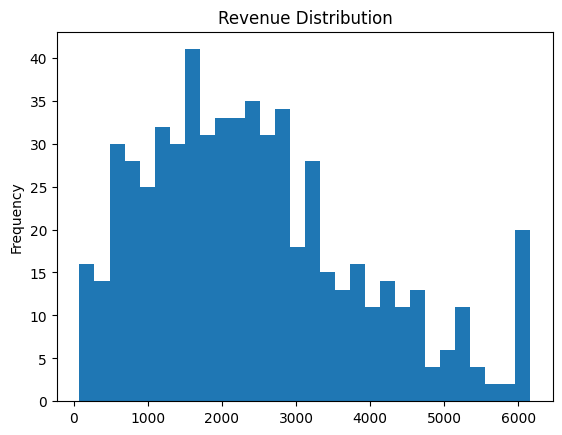

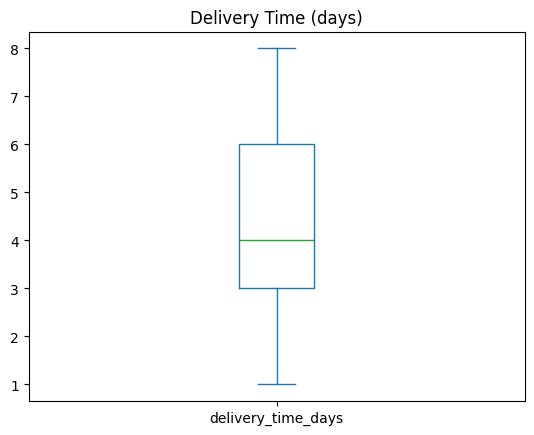

In [12]:
# Top cities and channel share printed
print('Top cities by orders:\n', df['city'].value_counts().head(10))
print('\nChannel share (%):\n', (df['channel'].value_counts(normalize=True)*100).round(1))
# Histogram and boxplot
plt.figure(); df['revenue'].plot(kind='hist', bins=30, title='Revenue Distribution'); plt.show()
plt.figure(); df['delivery_time_days'].plot(kind='box', title='Delivery Time (days)'); plt.show()


In [13]:
num_df = df.select_dtypes(include='number')
corr = num_df.corr(numeric_only=True)
print(corr[['revenue']].sort_values('revenue', ascending=False))


                     revenue
revenue             1.000000
estimated_cost      0.969354
gross_margin        0.901721
revenue_per_unit    0.715328
unit_price          0.646403
units               0.633658
returned            0.031872
delivery_time_days  0.027430
order_id            0.027413
customer_id         0.024349
is_weekend         -0.014081
discount_pct             NaN


In [14]:
clean_path = 'ecommerce_cleaned.csv'
df.to_csv(clean_path, index=False)
print('Saved cleaned file to', clean_path)


Saved cleaned file to ecommerce_cleaned.csv


In [15]:
from google.colab import files
files.download('ecommerce_cleaned.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>